In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

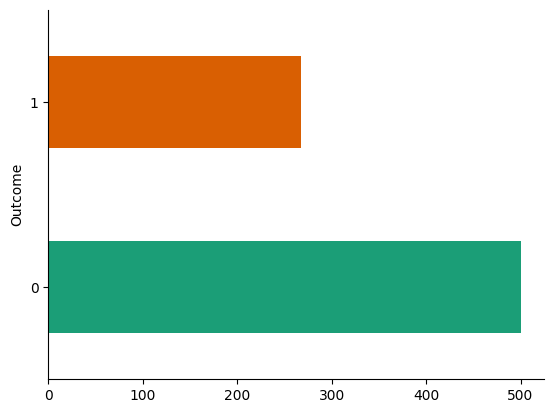

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Outcome').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2')) # Use the 'df' DataFrame instead of '_df_4'
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

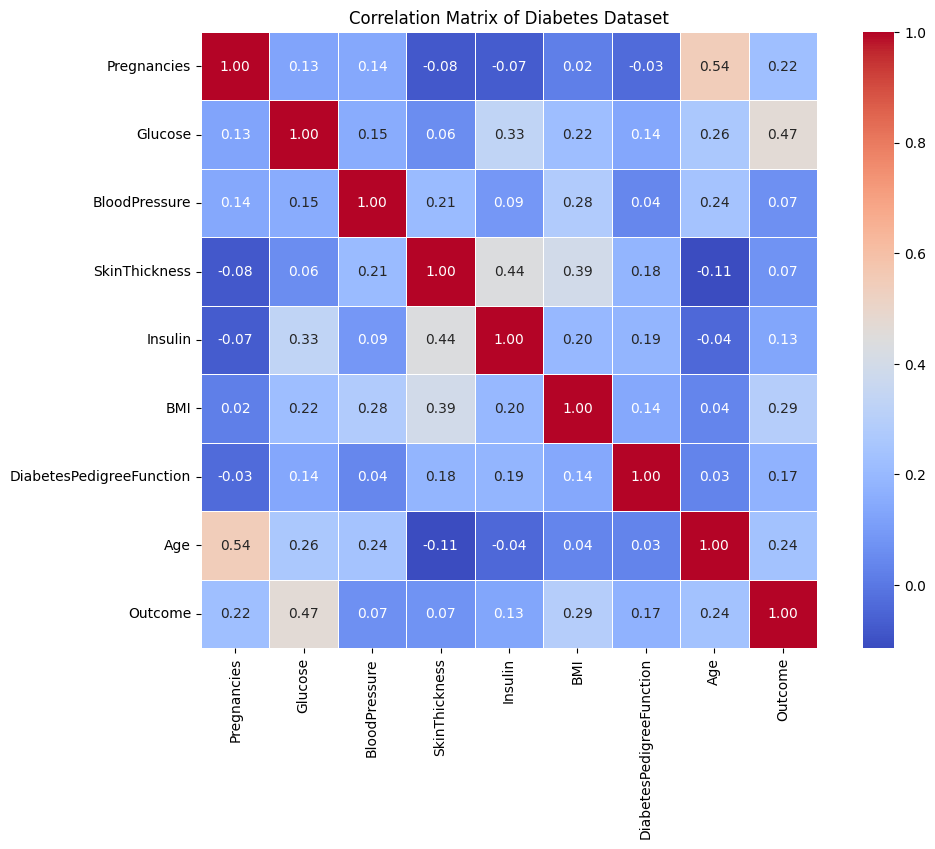

In [ ]:
#df.corr()
df_numeric = df.select_dtypes(exclude=['object'])
correlations = df_numeric.corr()
print(correlations)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diabetes dataset (replace 'diabetes.csv' with your dataset path)
# Assuming the dataset is in CSV format and has no missing values
data = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataset
print(data.head())

# Compute the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

# Set the title of the heatmap
plt.title('Correlation Matrix of Diabetes Dataset')

# Show the plot
plt.show()


In [ ]:
from sklearn.svm import SVC

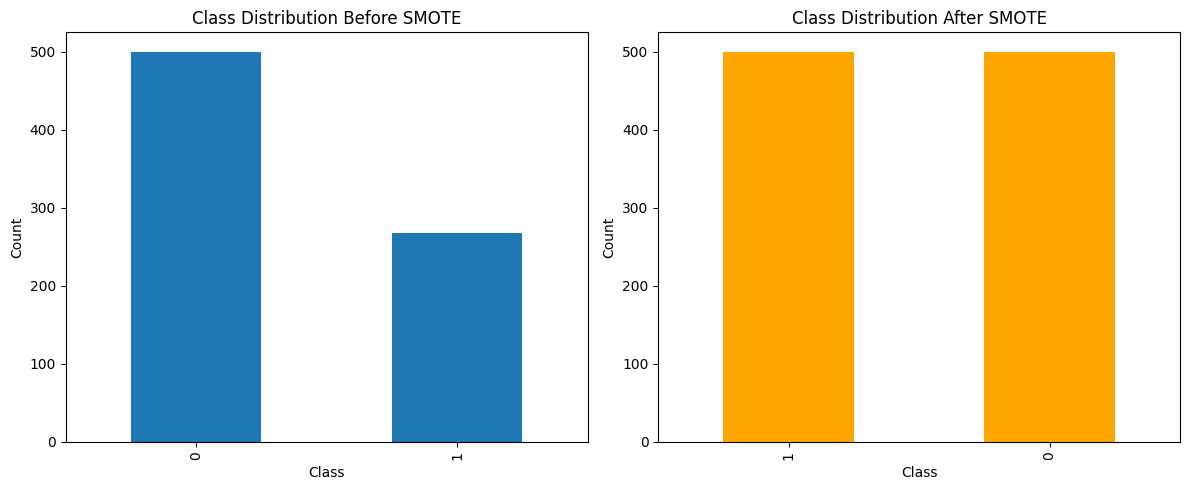

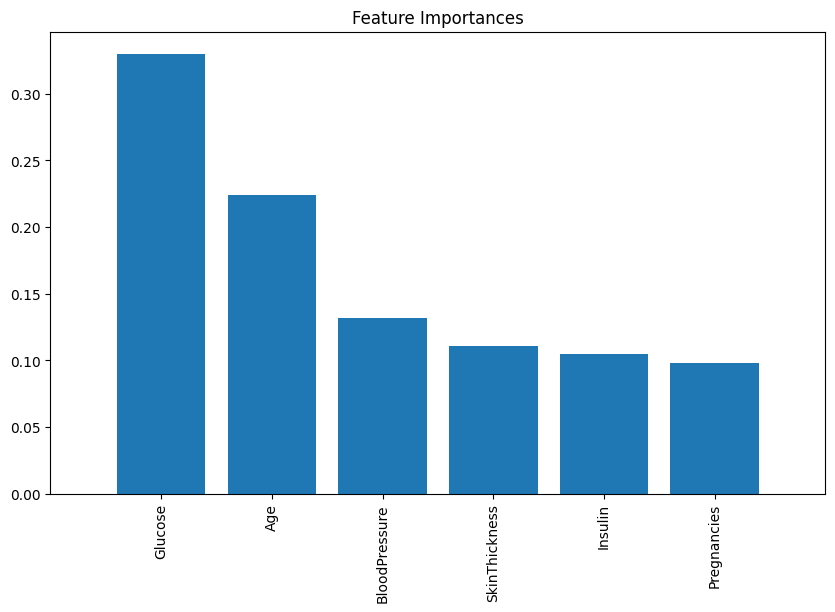

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Load the dataset
file_path = '/content/diabetes.csv'
data = pd.read_csv(file_path)

# Drop columns at index -3 and -4 (if necessary)
data.drop(data.columns[[-3, -4]], axis=1, inplace=True)

# Replace '?' with NaN (if needed)
data.replace('?', np.nan, inplace=True)

# Convert numeric columns to appropriate types
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
numeric_columns = [col for col in numeric_columns if col in data.columns]
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Encode target variable
target_column = 'Outcome'
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Check the distribution of the target variable before SMOTE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
data[target_column].value_counts().plot(kind='bar', title='Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(data.drop(target_column, axis=1), data[target_column])

# Check the distribution of the target variable after SMOTE
plt.subplot(1, 2, 2)
pd.Series(y).value_counts().plot(kind='bar', color='orange', title='Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Split data into features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply Recursive Feature Elimination (RFE)
log_reg = LogisticRegression(max_iter=20000, solver='saga')
rfe = RFE(estimator=log_reg, n_features_to_select=6)
X_train = rfe.fit_transform(X_train, y_train)
X_test = rfe.transform(X_test)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Feature Importance
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(data.drop(target_column, axis=1).columns)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Function to save DataFrame and Series as CSV
def save_data(X, y, filename_prefix):
    X_df = pd.DataFrame(X)
    y_series = pd.Series(y)
    data = pd.concat([X_df, y_series], axis=1)
    data.to_csv(f'{filename_prefix}.csv', index=False)

# Function to load DataFrame and Series from CSV
def load_data(filename):
    data = pd.read_csv(filename)
    X = data.drop(columns=data.columns[-1])  # Features
    y = data.iloc[:, -1]  # Target
    return X, y

# Save datasets
save_data(X_train, y_train, 'X_train_SMOTE')
save_data(X_test, y_test, 'X_test_SMOTE')

# Load datasets when needed
X_train_loaded, y_train_loaded = load_data('X_train_SMOTE.csv')
X_test_loaded, y_test_loaded = load_data('X_test_SMOTE.csv')

# Continue with model training and evaluation...


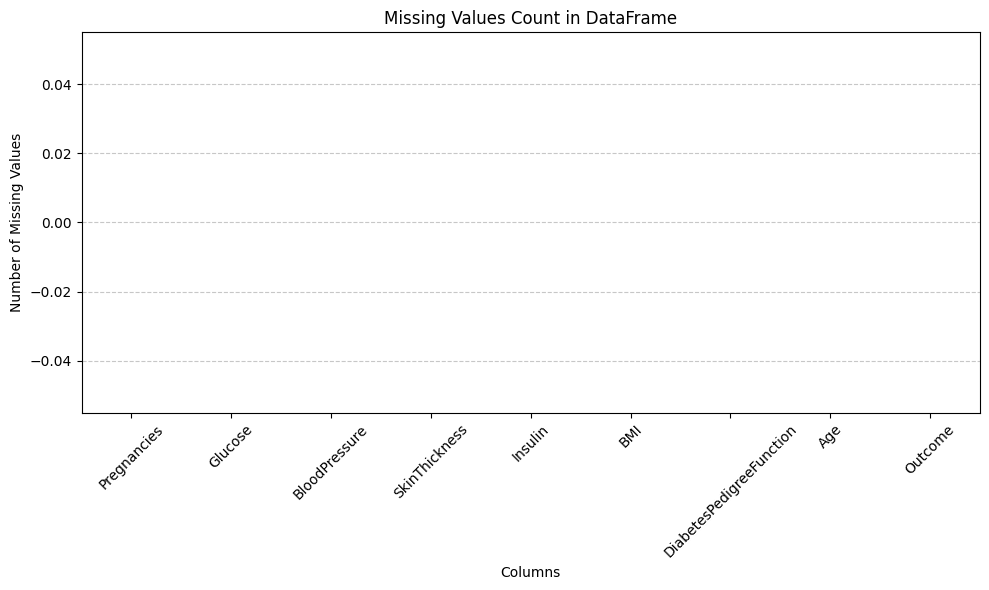

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
missing_counts = df.isnull().sum()

# Plotting
plt.figure(figsize=(10, 6))
missing_counts.plot(kind='bar', color='skyblue')
plt.title('Missing Values Count in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


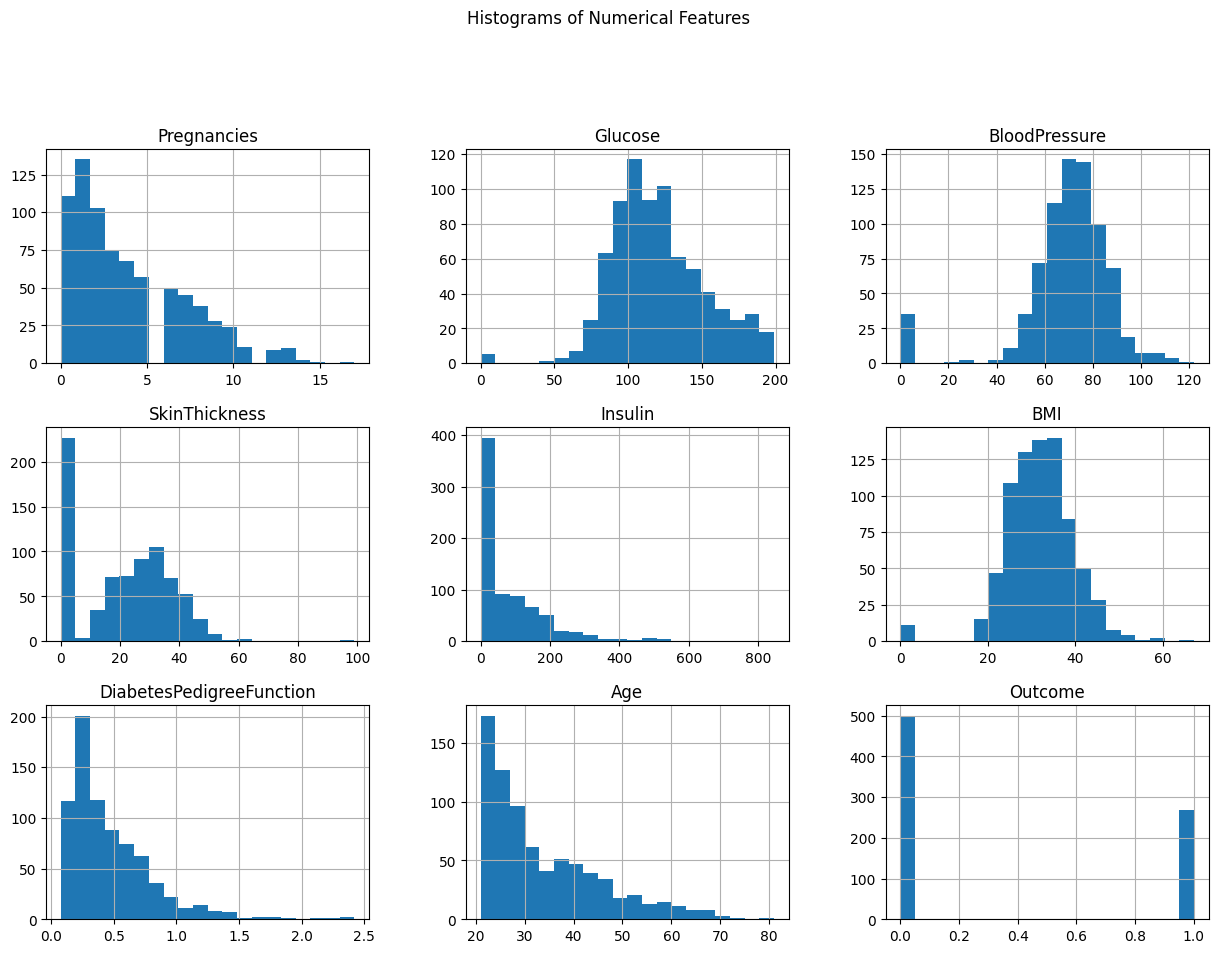

<Figure size 9000x6000 with 0 Axes>

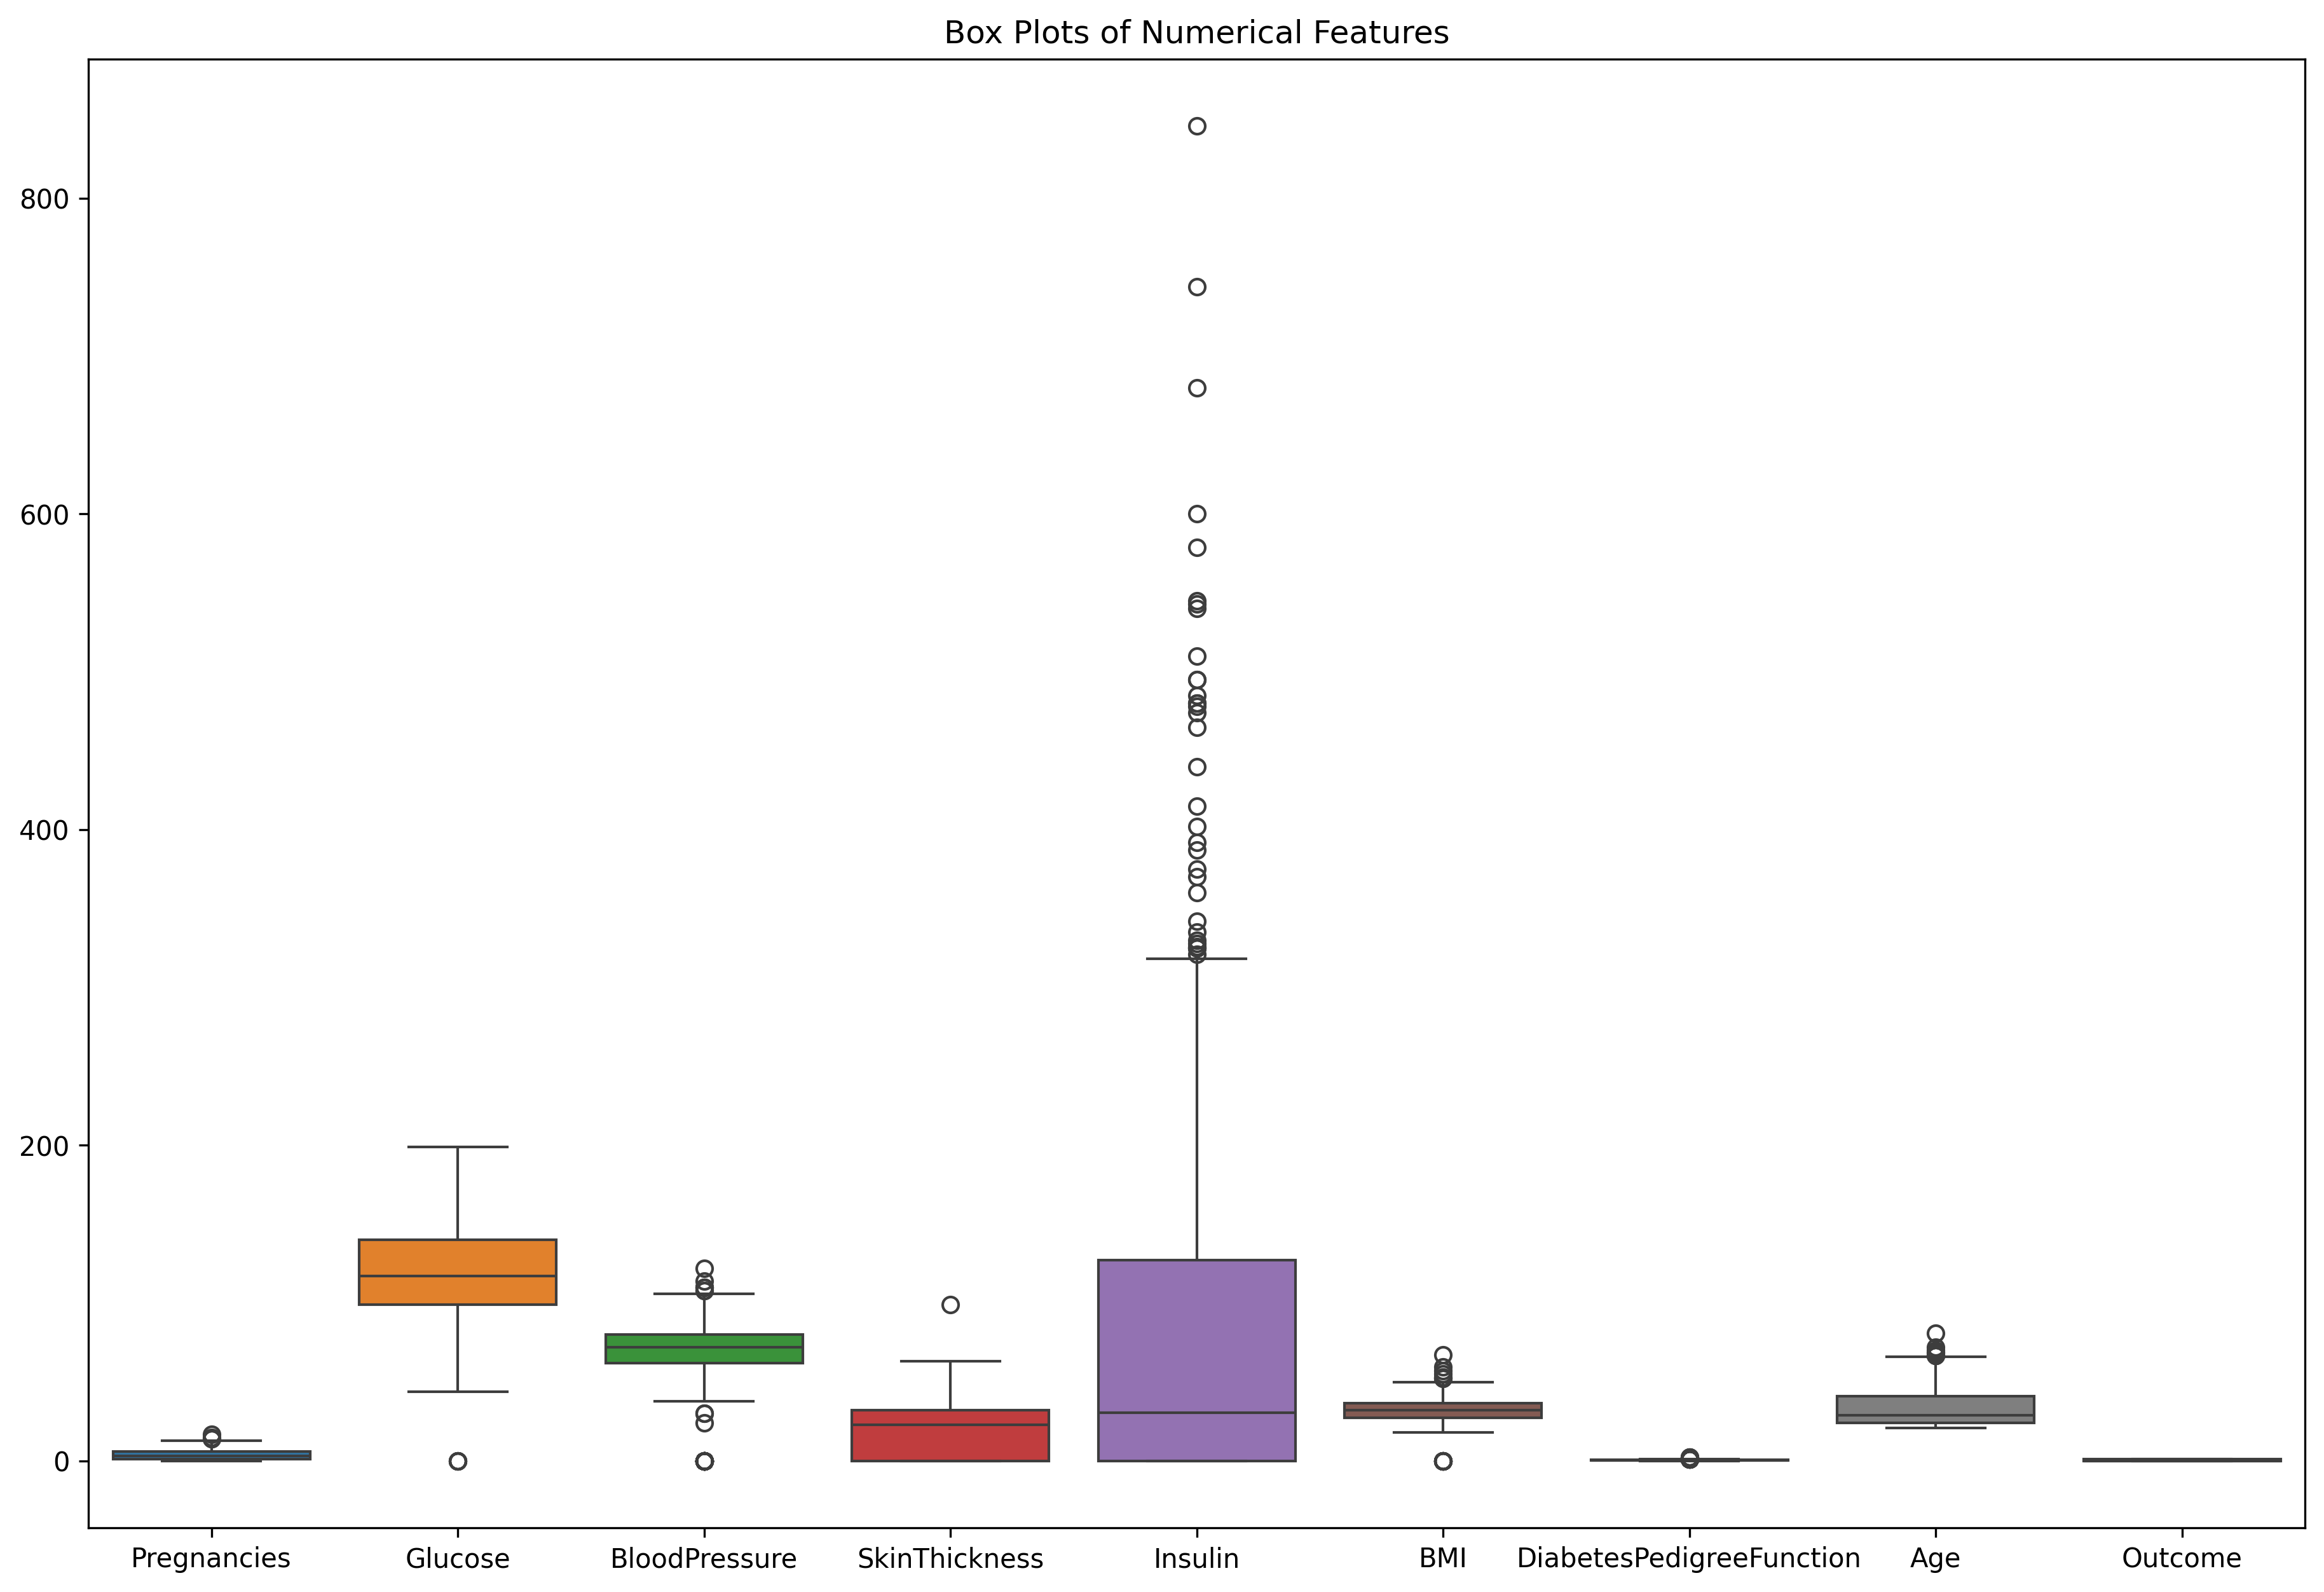

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Visualize the distribution of each feature
# Histograms for numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.figure(figsize=(15, 10), dpi  = 600)
plt.show()

# Box plots for numerical features
plt.figure(figsize=(15, 10), dpi  = 300)
sns.boxplot(data=df[numerical_features])
plt.title('Box Plots of Numerical Features')
plt.show()

# Count plots for categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 6), dpi  = 300)
    sns.countplot(x=feature, data=df, palette='viridis')
    plt.title(f'Count Plot of {feature}')
    plt.show()


# Models Training and Development

Random Forest With Hyperparameter Tuning

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Overall Metrics:
Accuracy: 0.98
Precision: 0.99
Recall: 0.98
F1-score: 0.98
ROC-AUC: 0.99

Class-wise Metrics:

Class 0:
  Precision: 1.00
  Recall: 0.97
  F1-score: 0.98
  Accuracy: 0.97

Class 1:
  Precision: 0.97
  Recall: 1.00
  F1-score: 0.99
  Accuracy: 1.00


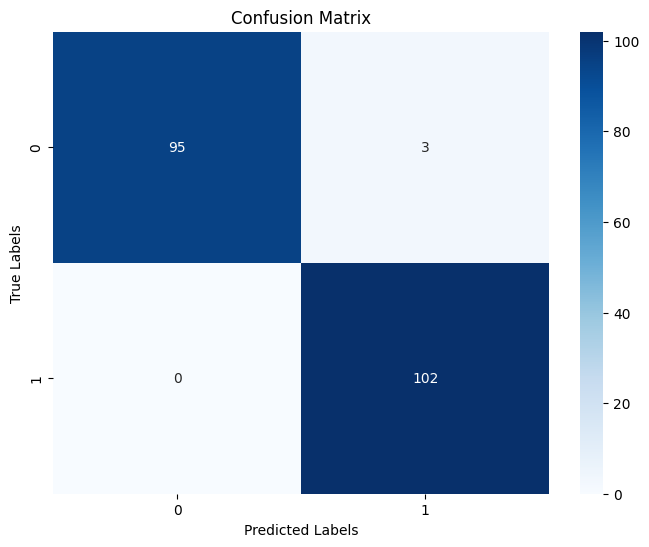

<ipython-input-12-0b17b0775ef4>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_values, y=metrics_names, palette='viridis')


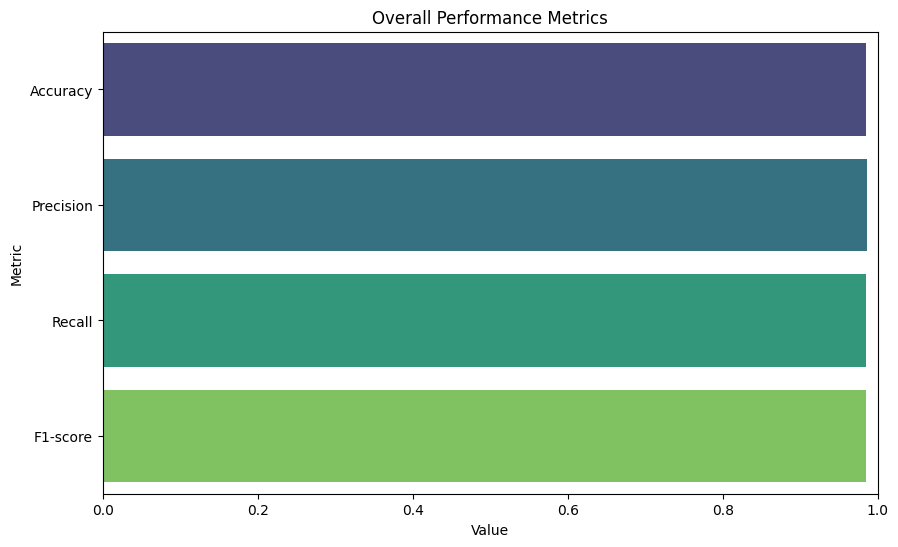

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Generate random binary dataset
X, y = make_classification(n_samples=1000, n_features=8, n_classes=2, n_clusters_per_class=1, n_informative=5, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=100, cv=5, verbose=3, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
best_rf_classifier = random_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)
y_prob = best_rf_classifier.predict_proba(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Overall metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_prob[:, 1])

# Class-wise metrics
class_report = classification_report(y_test, y_pred, output_dict=True)

# Display overall metrics
print("Overall Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Display class-wise metrics
print("\nClass-wise Metrics:")
for label, metrics in class_report.items():
    if label.isdigit():  # Only iterate over class labels, ignoring 'accuracy', 'macro avg', and 'weighted avg'
        print(f"\nClass {label}:")
        print(f"  Precision: {metrics['precision']:.2f}")
        print(f"  Recall: {metrics['recall']:.2f}")
        print(f"  F1-score: {metrics['f1-score']:.2f}")
        class_accuracy = conf_matrix[int(label), int(label)] / conf_matrix[int(label)].sum()
        print(f"  Accuracy: {class_accuracy:.2f}")

# Confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Bar plots for overall accuracy, precision, recall, and F1-score
metrics_values = [accuracy, precision, recall, f1]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_values, y=metrics_names, palette='viridis')
plt.title('Overall Performance Metrics')
plt.xlabel('Value')
plt.ylabel('Metric')
plt.xlim([0, 1])
plt.show()

# Save the best model
with open('best_rf_model_with_tuning.pkl', 'wb') as f:
    pickle.dump(best_rf_classifier, f)


With tuning Logistic Regression

Best parameters found:
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.98


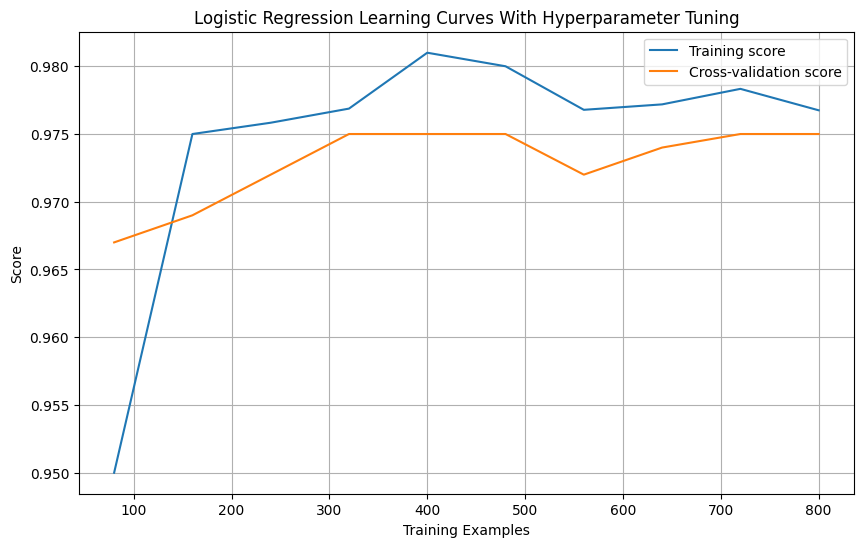

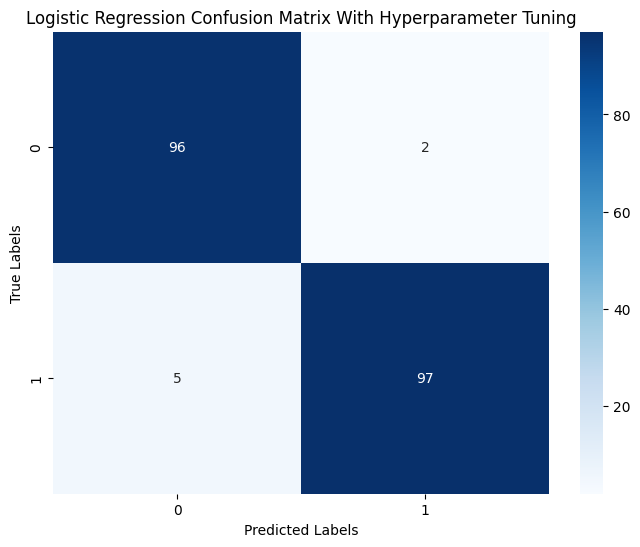

Class-wise Metrics for Logistic Regression With Hyperparameter Tuning:
              precision    recall  f1-score   support

     Class 0       0.95      0.98      0.96        98
     Class 1       0.98      0.95      0.97       102

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200

Logistic Regression Classification Report With Hyperparameter Tuning:
Overall Accuracy: 0.96
Precision: 0.97
Recall: 0.97
F1-score: 0.96
ROC-AUC: 0.99


<ipython-input-13-e5570e7e529f>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_values_best_lr, y=metrics_names_best_lr, palette='viridis')


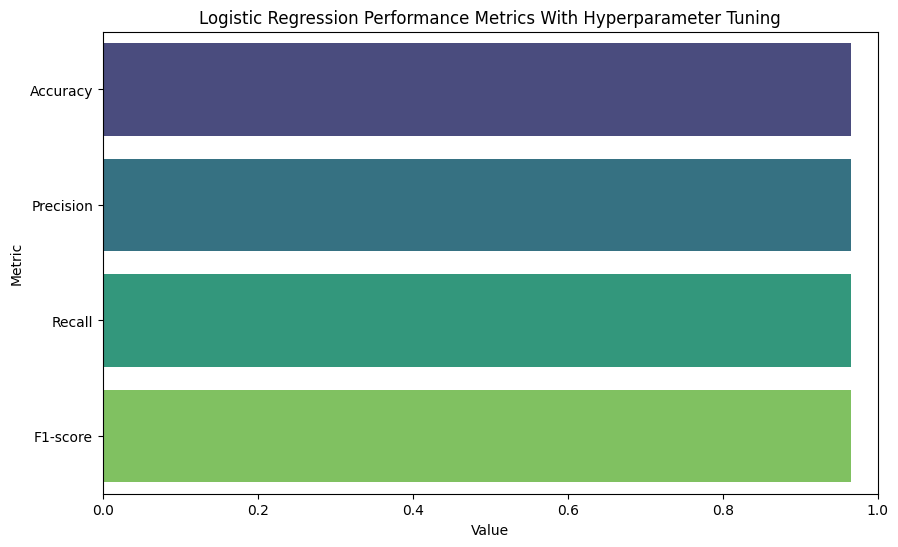

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import learning_curve

# Generate random multiclass dataset
X, y = make_classification(n_samples=1000, n_features=8, n_classes=2, n_clusters_per_class=1, n_informative=5, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, n_jobs=-1, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found:")
print(grid_search.best_params_)
print(f"Best score: {grid_search.best_score_:.2f}")

# Use the best estimator
best_lr_classifier = grid_search.best_estimator_

# Predictions
y_pred_best_lr = best_lr_classifier.predict(X_test)
y_prob_best_lr = best_lr_classifier.predict_proba(X_test)

# Confusion matrix
conf_matrix_best_lr = confusion_matrix(y_test, y_pred_best_lr)

# Overall metrics
accuracy_best_lr = accuracy_score(y_test, y_pred_best_lr)
precision_best_lr = precision_score(y_test, y_pred_best_lr, average='macro')
recall_best_lr = recall_score(y_test, y_pred_best_lr, average='macro')
f1_best_lr = f1_score(y_test, y_pred_best_lr, average='macro')
roc_auc_best_lr = roc_auc_score(y_test, y_prob_best_lr[:, 1])

# Learning curves
train_sizes_best_lr, train_scores_best_lr, test_scores_best_lr, fit_times_best_lr, _ = learning_curve(
    best_lr_classifier, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), return_times=True)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_best_lr, np.mean(train_scores_best_lr, axis=1), label='Training score')
plt.plot(train_sizes_best_lr, np.mean(test_scores_best_lr, axis=1), label='Cross-validation score')
plt.title('Logistic Regression Learning Curves With Hyperparameter Tuning')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix With Hyperparameter Tuning')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Class-wise metrics using classification_report
print("Class-wise Metrics for Logistic Regression With Hyperparameter Tuning:")
class_report = classification_report(y_test, y_pred_best_lr, target_names=['Class 0', 'Class 1'])
print(class_report)

# Overall metrics report
print("Logistic Regression Classification Report With Hyperparameter Tuning:")
print(f"Overall Accuracy: {accuracy_best_lr:.2f}")
print(f"Precision: {precision_best_lr:.2f}")
print(f"Recall: {recall_best_lr:.2f}")
print(f"F1-score: {f1_best_lr:.2f}")
print(f"ROC-AUC: {roc_auc_best_lr:.2f}")

# Bar plots for accuracy, precision, recall, and F1-score
metrics_values_best_lr = [accuracy_best_lr, precision_best_lr, recall_best_lr, f1_best_lr]
metrics_names_best_lr = ['Accuracy', 'Precision', 'Recall', 'F1-score']

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_values_best_lr, y=metrics_names_best_lr, palette='viridis')
plt.title('Logistic Regression Performance Metrics With Hyperparameter Tuning')
plt.xlabel('Value')
plt.ylabel('Metric')
plt.xlim([0, 1])
plt.show()

# Save the best model
with open('best_lr_model_with_tuning.pkl', 'wb') as f:
    pickle.dump(best_lr_classifier, f)


With tuning Hyperparameter KNN

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:
{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
Best score: 0.97
Class-wise Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        98
           1       0.97      0.98      0.98       102

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



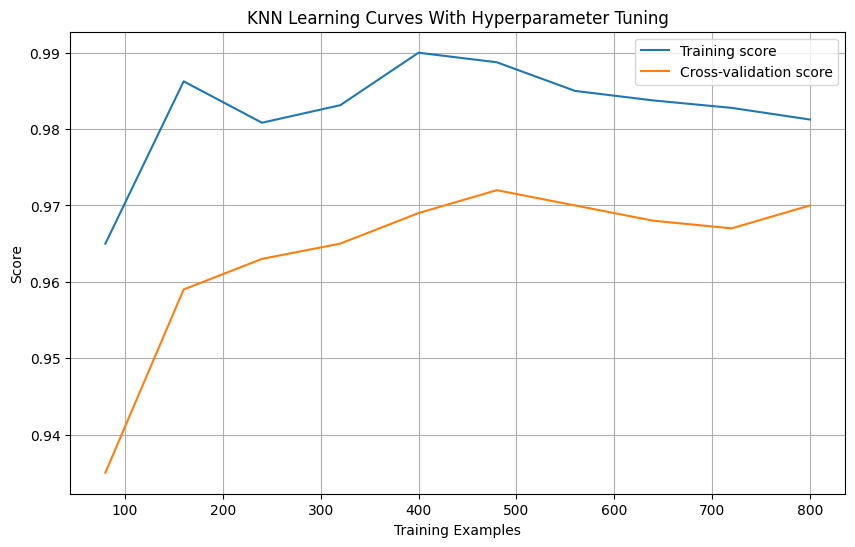

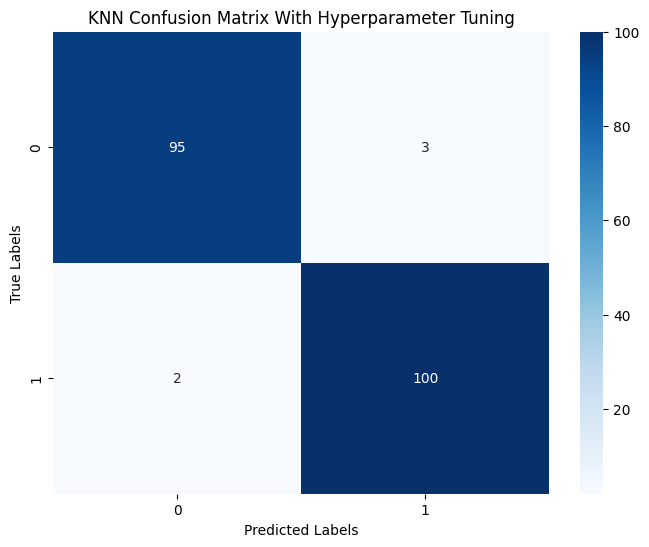

KNN Classification Report With Hyperparameter Tuning:
Accuracy: 0.97
Precision: 0.98
Recall: 0.97
F1-score: 0.97


<ipython-input-14-ce705c2a538d>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_values_best_knn, y=metrics_names_best_knn, palette='viridis')


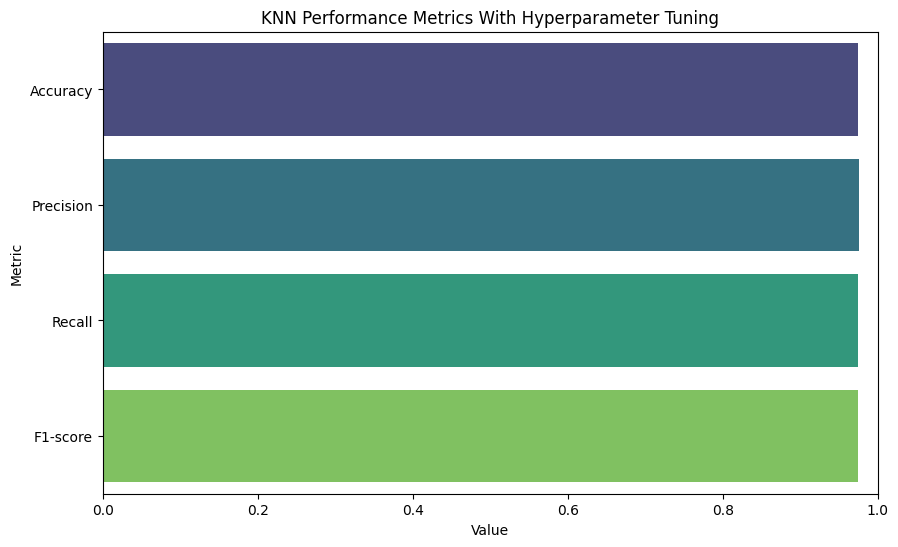

In [ ]:
# Import necessary libraries
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Generate random dataset
X, y = make_classification(n_samples=1000, n_features=8, n_classes=2, n_clusters_per_class=1, n_informative=5, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize and fit GridSearchCV with KNeighborsClassifier
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Display best parameters and score
print("Best parameters found:")
print(grid_search.best_params_)
print(f"Best score: {grid_search.best_score_:.2f}")

# Use the best estimator
best_knn_classifier = grid_search.best_estimator_

# Make predictions
y_pred_best_knn = best_knn_classifier.predict(X_test)

# Confusion matrix and evaluation metrics
conf_matrix_best_knn = confusion_matrix(y_test, y_pred_best_knn)
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
precision_best_knn = precision_score(y_test, y_pred_best_knn, average='macro')
recall_best_knn = recall_score(y_test, y_pred_best_knn, average='macro')
f1_best_knn = f1_score(y_test, y_pred_best_knn, average='macro')

# Class-wise classification report
print("Class-wise Classification Report:")
print(classification_report(y_test, y_pred_best_knn))

# Learning curve
train_sizes_best_knn, train_scores_best_knn, test_scores_best_knn, fit_times_best_knn, _ = learning_curve(
    best_knn_classifier, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), return_times=True)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_best_knn, np.mean(train_scores_best_knn, axis=1), label='Training score')
plt.plot(train_sizes_best_knn, np.mean(test_scores_best_knn, axis=1), label='Cross-validation score')
plt.title('KNN Learning Curves With Hyperparameter Tuning')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix With Hyperparameter Tuning')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report summary
print("KNN Classification Report With Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_best_knn:.2f}")
print(f"Precision: {precision_best_knn:.2f}")
print(f"Recall: {recall_best_knn:.2f}")
print(f"F1-score: {f1_best_knn:.2f}")

# Bar plot of performance metrics
metrics_values_best_knn = [accuracy_best_knn, precision_best_knn, recall_best_knn, f1_best_knn]
metrics_names_best_knn = ['Accuracy', 'Precision', 'Recall', 'F1-score']
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_values_best_knn, y=metrics_names_best_knn, palette='viridis')
plt.title('KNN Performance Metrics With Hyperparameter Tuning')
plt.xlabel('Value')
plt.ylabel('Metric')
plt.xlim([0, 1])
plt.show()

# Save the best model
with open('best_knn_model_with_tuning.pkl', 'wb') as f:
    pickle.dump(best_knn_classifier, f)


Stacking

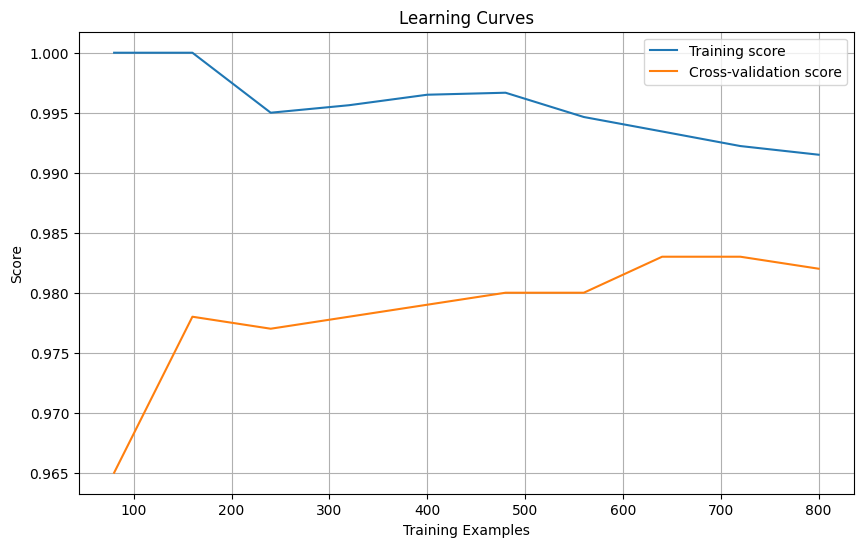

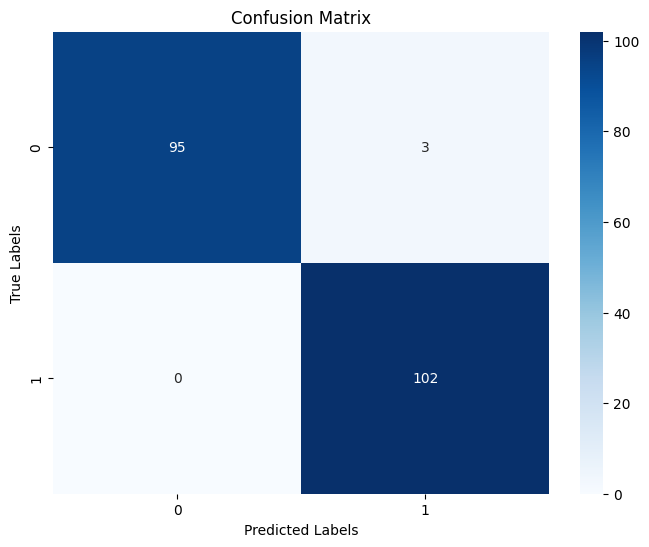

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        98
           1       0.97      1.00      0.99       102

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



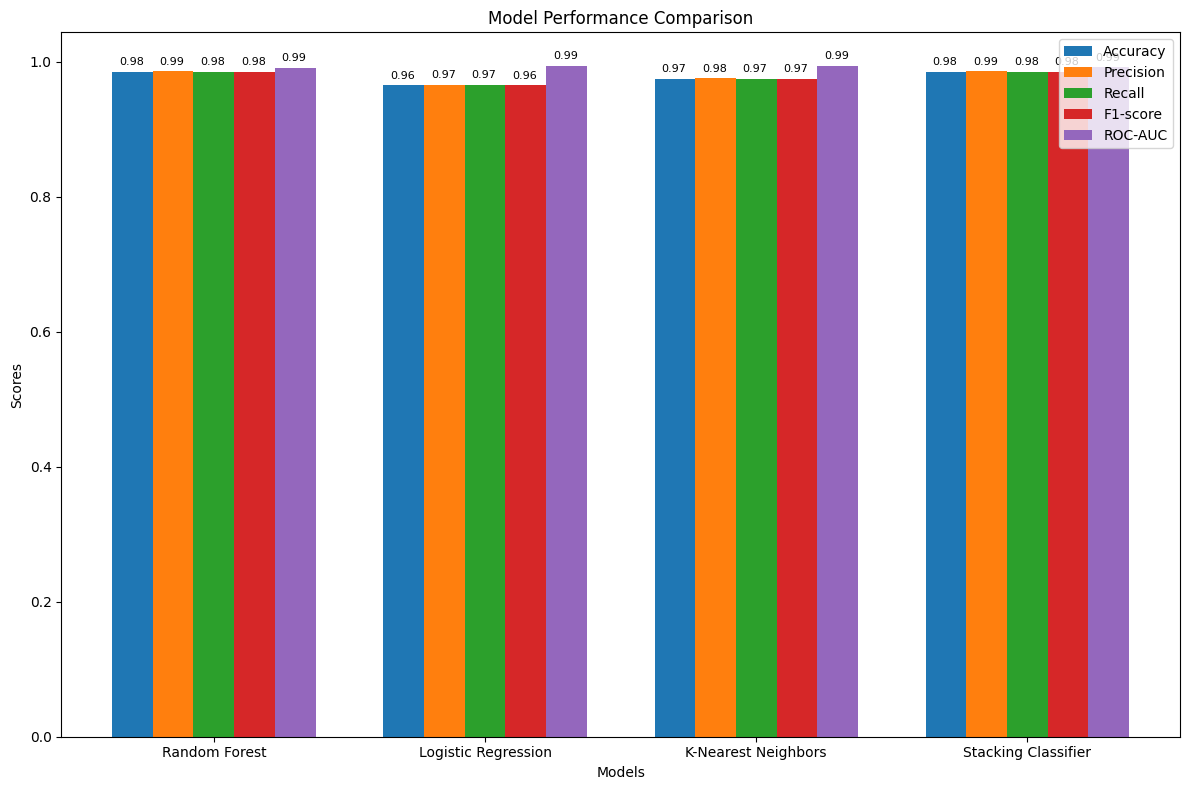

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report
)

# Generate random multiclass dataset
X, y = make_classification(n_samples=1000, n_features=8, n_classes=2, n_clusters_per_class=1, n_informative=5, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load best models
with open('best_rf_model_with_tuning.pkl', 'rb') as f:
    best_rf_classifier = pickle.load(f)

with open('best_lr_model_with_tuning.pkl', 'rb') as f:
    best_lr_classifier = pickle.load(f)

with open('best_knn_model_with_tuning.pkl', 'rb') as f:
    best_knn_classifier = pickle.load(f)

# Define the Stacking ensemble model
estimators = [
    ('rf', best_rf_classifier),
    ('lr', best_lr_classifier),
    ('knn', best_knn_classifier)
]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

# Train the Stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)
y_prob = stacking_clf.predict_proba(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Metrics for individual classifiers
classifiers = {
    'Random Forest': best_rf_classifier,
    'Logistic Regression': best_lr_classifier,
    'K-Nearest Neighbors': best_knn_classifier,
    'Stacking Classifier': stacking_clf
}

metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'ROC-AUC': []}

for model_name, model in classifiers.items():
    y_pred_model = model.predict(X_test)
    y_prob_model = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred_model)
    precision = precision_score(y_test, y_pred_model, average='macro')
    recall = recall_score(y_test, y_pred_model, average='macro')
    f1 = f1_score(y_test, y_pred_model, average='macro')
    roc_auc = roc_auc_score(y_test, y_prob_model)

    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-score'].append(f1)
    metrics['ROC-AUC'].append(roc_auc)

# Convert metrics to DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics)

# Learning curves
train_sizes, train_scores, test_scores = learning_curve(
    stacking_clf, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Learning Curves')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Comparative bar chart
plt.figure(figsize=(12, 8))
bar_width = 0.15
index = np.arange(len(metrics_df['Model']))

for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']):
    plt.bar(index + i * bar_width, metrics_df[metric], bar_width, label=metric)

# Add numerical labels
for i in range(len(metrics_df['Model'])):
    for j, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']):
        plt.text(index[i] + j * bar_width - 0.05, metrics_df[metric][i] + 0.01, f'{metrics_df[metric][i]:.2f}', fontsize=8)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(index + 0.3, metrics_df['Model'])
plt.legend()
plt.tight_layout()
plt.show()

# Save the Stacking model
with open('stacking_model.pkl', 'wb') as f:
    pickle.dump(stacking_clf, f)


**Tab Transformer**

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the TabTransformer model
class TabTransformer(nn.Module):
    def __init__(self, num_features, num_classes, dim_embedding=64, num_heads=4, num_layers=4):
        super(TabTransformer, self).__init__()
        self.embedding = nn.Linear(num_features, dim_embedding)
        encoder_layer = nn.TransformerEncoderLayer(d_model=dim_embedding, nhead=num_heads, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.classifier = nn.Linear(dim_embedding, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)  # Adding a sequence length dimension
        x = self.transformer(x)
        x = torch.mean(x, dim=1)  # Pooling
        x = self.classifier(x)
        return x

# Load the dataset
data = pd.read_csv('/content/diabetes.csv')

# Splitting the dataset into features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']  # Outcome should be either 0 or 1

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model parameters
num_features = X_train_scaled.shape[1]
num_classes = 2  # Binary classification (Outcome is 0 or 1)

# Initialize the model, loss, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TabTransformer(num_features, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Converting data to tensors and moving to device (GPU or CPU)
X_train_tensor = torch.FloatTensor(X_train_scaled).to(device)
y_train_tensor = torch.LongTensor(y_train.values).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)
y_test_tensor = torch.LongTensor(y_test.values).to(device)

# Training loop
for epoch in range(100):
    model.train()  # Set model to training mode
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Evaluation
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_tensor)
    _, predicted_classes = torch.max(predictions, 1)
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f'Test Accuracy: {accuracy.item()}')


Epoch 0, Loss: 0.9340900778770447
Epoch 10, Loss: 0.5030128955841064
Epoch 20, Loss: 0.46226784586906433
Epoch 30, Loss: 0.4328744113445282
Epoch 40, Loss: 0.41947051882743835
Epoch 50, Loss: 0.4027560353279114
Epoch 60, Loss: 0.38418877124786377
Epoch 70, Loss: 0.36124327778816223
Epoch 80, Loss: 0.34405526518821716
Epoch 90, Loss: 0.3241426944732666
Test Accuracy: 0.7272727489471436


# **Hybrid Ensemble with XGBoost (Stacking + Tab Transformer Technique)**

In [ ]:
!pip install xgboost


In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import numpy as np
import pickle

# Part 1: Define and Train TabTransformer Model
class TabTransformer(nn.Module):
    def __init__(self, num_features, num_classes, dim_embedding=64, num_heads=4, num_layers=4):
        super(TabTransformer, self).__init__()
        self.embedding = nn.Linear(num_features, dim_embedding)
        encoder_layer = nn.TransformerEncoderLayer(d_model=dim_embedding, nhead=num_heads, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.classifier = nn.Linear(dim_embedding, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)  # Adding a sequence length dimension
        x = self.transformer(x)
        x = torch.mean(x, dim=1)  # Pooling
        x = self.classifier(x)
        return x

# Load dataset
data = pd.read_csv('/content/diabetes.csv')
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model parameters
num_features = X_train_scaled.shape[1]
num_classes = 2

# Initialize the TabTransformer model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tab_model = TabTransformer(num_features, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(tab_model.parameters(), lr=0.001)

# Convert data to tensors
X_train_tensor = torch.FloatTensor(X_train_scaled).to(device)
y_train_tensor = torch.LongTensor(y_train.values).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)

# Train TabTransformer
for epoch in range(50):  # Reduced epochs for demonstration
    tab_model.train()
    optimizer.zero_grad()
    output = tab_model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Get predictions from TabTransformer
tab_model.eval()
with torch.no_grad():
    tab_predictions = tab_model(X_test_tensor)
    tab_probabilities = torch.softmax(tab_predictions, dim=1).cpu().numpy()

# Part 2: Train Stacking Model
# Load pre-trained models for stacking
with open('best_rf_model_with_tuning.pkl', 'rb') as f:
    best_rf_classifier = pickle.load(f)
with open('best_lr_model_with_tuning.pkl', 'rb') as f:
    best_lr_classifier = pickle.load(f)
with open('best_knn_model_with_tuning.pkl', 'rb') as f:
    best_knn_classifier = pickle.load(f)

# Define and train stacking model
estimators = [
    ('rf', best_rf_classifier),
    ('lr', best_lr_classifier),
    ('knn', best_knn_classifier)
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_clf.fit(X_train_scaled, y_train)

# Get predictions from Stacking Model
stacking_probabilities = stacking_clf.predict_proba(X_test_scaled)

# Part 3: Combine TabTransformer and Stacking Model in a Meta-learner with XGBoost
# Concatenate predictions from both models
combined_predictions = np.hstack((tab_probabilities, stacking_probabilities))

# Train final meta-classifier (XGBoost) on combined predictions
meta_classifier = XGBClassifier(eval_metric='mlogloss', random_state=42)
meta_classifier.fit(combined_predictions, y_test)

# Get final predictions and classification report from Meta-learner (XGBoost)
final_predictions = meta_classifier.predict(combined_predictions)
print("Meta-Learner (XGBoost) Classification Report:\n", classification_report(y_test, final_predictions))


Epoch 0, Loss: 0.6258160471916199
Epoch 10, Loss: 0.49888455867767334
Epoch 20, Loss: 0.45676106214523315
Epoch 30, Loss: 0.42915067076683044
Epoch 40, Loss: 0.4119279980659485
Meta-Learner (XGBoost) Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        99
           1       0.98      0.98      0.98        55

    accuracy                           0.99       154
   macro avg       0.99      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154

